# Section 1: Data Preparation

- Generate synthetic data using the three-variable non-linear equation.
- Plot a 4D visualization.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Step 1: Generate synthetic data
np.random.seed(42)
num_samples = 1000

x1 = np.random.uniform(-3, 3, num_samples)  # x1 in range [-3, 3]
x2 = np.random.uniform(0, 3, num_samples)   # x2 in range [0, 3]
x3 = np.random.uniform(0, 3, num_samples)   # x3 in range [0, 3]

# Non-linear equation for y
y = np.sin(x1) + np.log(x2 + 1) + np.exp(-x3)

# Step 2: Store in DataFrame
df = pd.DataFrame({"x1": x1, "x2": x2, "x3": x3, "y": y})

# Display the first few rows of the dataset
display(df)


,x1,x2,x3,y
0,-0.752759,0.555399,0.785117,0.214143
1,2.704286,1.625703,0.740936,1.865517
2,1.391964,2.618838,2.718764,2.336161
3,0.591951,2.196675,0.748639,2.193102
4,-2.063888,2.419683,0.815849,0.790938
...,...,...,...,...
995,-2.450508,1.970865,2.595887,0.526059
996,2.503881,2.869844,0.471820,2.572438
997,-2.179088,0.206874,0.929364,-0.237787
998,2.701424,0.171164,0.870137,1.002985


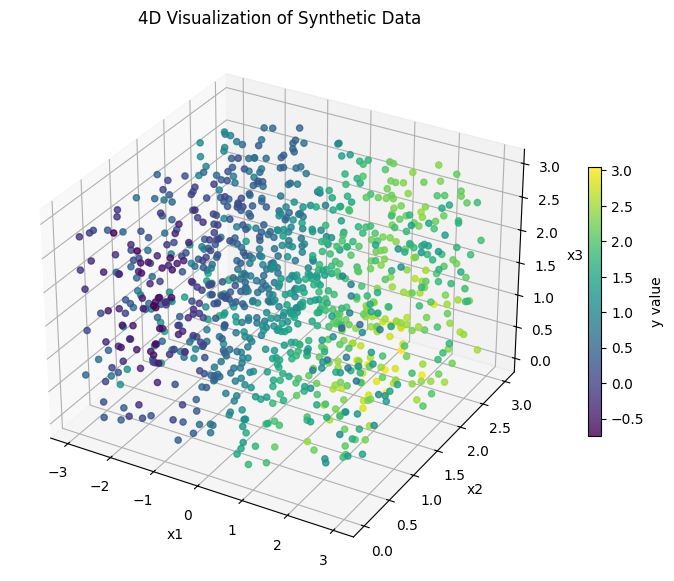

In [3]:
# Step 3: 4D Plot Visualization

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using x1, x2, x3 as coordinates and y as color
sc = ax.scatter(df["x1"], df["x2"], df["x3"], c=df["y"], cmap='viridis', alpha=0.8)

# Labels and title
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")
ax.set_title("4D Visualization of Synthetic Data")

# Color bar to show the mapping of colors to y values
cbar = plt.colorbar(sc, ax=ax, shrink=0.5)
cbar.set_label("y value")

# Show the plot
plt.show()


# Section 2: Neural Network Implementations
- NumPy from Scratch – Implement a 3-layer deep neural network with manual backpropagation.
- PyTorch from Scratch – Implement a 3-layer neural network without using built-in layers.
- PyTorch Module-based – Use PyTorch’s module system to structure the neural network.
- PyTorch Lightning Version – Implement the same using PyTorch Lightning.
- TensorFlow from Scratch – Implement a 3-layer neural network manually, avoiding high-level APIs.
- TensorFlow Built-in Layers – Use TensorFlow’s built-in layers.
- TensorFlow Functional API – Implement the neural network using the Functional API.

## NumPy from Scratch

- Hidden Layer 1: 10 neurons (ReLU activation).
- Hidden Layer 2: 5 neurons (ReLU activation).
- Output Layer: 1 neuron (Linear activation for regression).

Epoch 0: Loss = 2.060359
Epoch 100: Loss = 0.906564
Epoch 200: Loss = 0.752069
Epoch 300: Loss = 0.731398
Epoch 400: Loss = 0.728633
Epoch 500: Loss = 0.728263
Epoch 600: Loss = 0.728214
Epoch 700: Loss = 0.728206
Epoch 800: Loss = 0.728205
Epoch 900: Loss = 0.728204


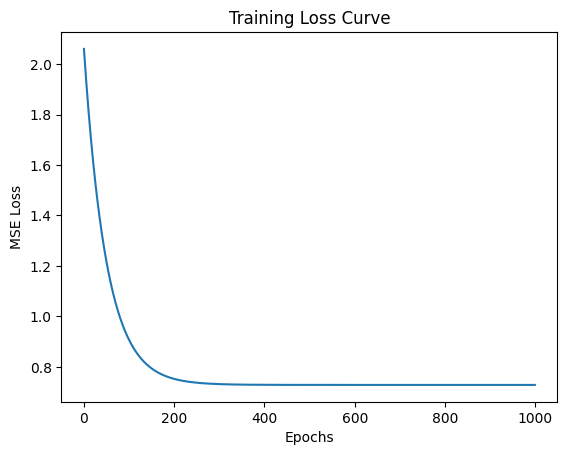

In [4]:
# Step 1: Implementing a 3-Layer Neural Network from Scratch using NumPy

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define activation functions and their derivatives
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Define the Neural Network class
class ThreeLayerNN:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, learning_rate=0.01):
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size1) * 0.01
        self.b1 = np.zeros((1, hidden_size1))
        self.W2 = np.random.randn(hidden_size1, hidden_size2) * 0.01
        self.b2 = np.zeros((1, hidden_size2))
        self.W3 = np.random.randn(hidden_size2, output_size) * 0.01
        self.b3 = np.zeros((1, output_size))

    def forward(self, X):
        """Forward pass"""
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = relu(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = relu(self.Z2)
        self.Z3 = np.dot(self.A2, self.W3) + self.b3  # Linear activation
        return self.Z3  # Output layer

    def backward(self, X, y, y_pred):
        """Backward propagation (Manual Gradients)"""
        m = y.shape[0]

        # Compute gradients
        dZ3 = (y_pred - y) / m  # Derivative of MSE Loss
        dW3 = np.dot(self.A2.T, dZ3)
        db3 = np.sum(dZ3, axis=0, keepdims=True)

        dA2 = np.dot(dZ3, self.W3.T)
        dZ2 = dA2 * relu_derivative(self.Z2)
        dW2 = np.dot(self.A1.T, dZ2)
        db2 = np.sum(dZ2, axis=0, keepdims=True)

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * relu_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)

        # Update weights and biases
        self.W3 -= self.learning_rate * dW3
        self.b3 -= self.learning_rate * db3
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1

    def train(self, X, y, epochs=1000):
        """Training loop"""
        losses = []
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = mse_loss(y, y_pred)
            losses.append(loss)
            self.backward(X, y, y_pred)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.6f}")

        return losses

# Prepare the dataset
X_train = df[["x1", "x2", "x3"]].values  # Inputs
y_train = df[["y"]].values  # Output

# Initialize the neural network
nn = ThreeLayerNN(input_size=3, hidden_size1=10, hidden_size2=5, output_size=1, learning_rate=0.01)

# Train the neural network
losses = nn.train(X_train, y_train, epochs=1000)

# Plot the loss curve
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve")
plt.show()


## PyTorch from Scratch

- What Are We Implementing?
We are implementing a fully connected 3-layer neural network for non-linear regression from scratch using PyTorch, but without any built-in layers (torch.nn.Linear, torch.nn.Module).

- Architecture of the Neural Network
Input Layer: 3 neurons (
𝑥
1
,
𝑥
2
,
𝑥
3
x
1
​
 ,x
2
​
 ,x
3
​
 )
- Hidden Layer 1: 10 neurons (ReLU activation)
- Hidden Layer 2: 5 neurons (ReLU activation)
- Output Layer: 1 neuron (Regression output with Linear activation)


Epoch 0: Loss = 2.060371
Epoch 100: Loss = 0.906533
Epoch 200: Loss = 0.752067
Epoch 300: Loss = 0.731409
Epoch 400: Loss = 0.728646
Epoch 500: Loss = 0.728276
Epoch 600: Loss = 0.728225
Epoch 700: Loss = 0.728217
Epoch 800: Loss = 0.728214
Epoch 900: Loss = 0.728212


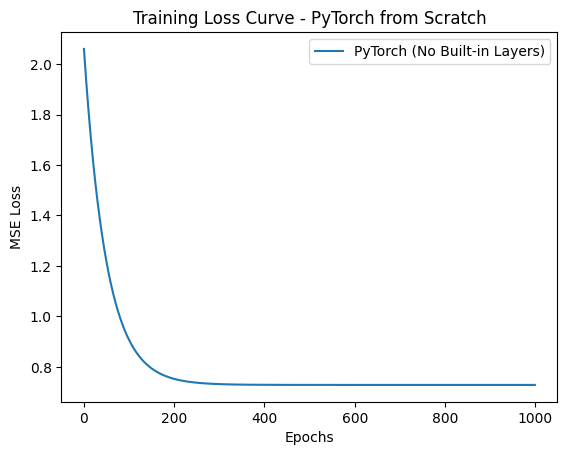

In [5]:
# Step 2: Implementing a 3-Layer Neural Network from Scratch Using PyTorch (Without Built-in Layers)

import torch

# Set random seed for reproducibility
torch.manual_seed(42)

# Define activation functions and their derivatives
def relu(x):
    return torch.maximum(torch.tensor(0.0), x)

def relu_derivative(x):
    return (x > 0).float()

# Define the PyTorch Neural Network Class (without using built-in layers)
class ThreeLayerNN_PyTorch:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, learning_rate=0.01):
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.W1 = torch.randn(input_size, hidden_size1, dtype=torch.float32) * 0.01
        self.b1 = torch.zeros((1, hidden_size1), dtype=torch.float32)
        self.W2 = torch.randn(hidden_size1, hidden_size2, dtype=torch.float32) * 0.01
        self.b2 = torch.zeros((1, hidden_size2), dtype=torch.float32)
        self.W3 = torch.randn(hidden_size2, output_size, dtype=torch.float32) * 0.01
        self.b3 = torch.zeros((1, output_size), dtype=torch.float32)

    def forward(self, X):
        """Forward pass"""
        self.Z1 = torch.mm(X, self.W1) + self.b1
        self.A1 = relu(self.Z1)
        self.Z2 = torch.mm(self.A1, self.W2) + self.b2
        self.A2 = relu(self.Z2)
        self.Z3 = torch.mm(self.A2, self.W3) + self.b3  # Linear activation
        return self.Z3  # Output layer

    def backward(self, X, y, y_pred):
        """Backward propagation (Manual Gradients)"""
        m = y.shape[0]

        # Compute gradients
        dZ3 = (y_pred - y) / m  # Derivative of MSE Loss
        dW3 = torch.mm(self.A2.T, dZ3)
        db3 = torch.sum(dZ3, axis=0, keepdims=True)

        dA2 = torch.mm(dZ3, self.W3.T)
        dZ2 = dA2 * relu_derivative(self.Z2)
        dW2 = torch.mm(self.A1.T, dZ2)
        db2 = torch.sum(dZ2, axis=0, keepdims=True)

        dA1 = torch.mm(dZ2, self.W2.T)
        dZ1 = dA1 * relu_derivative(self.Z1)
        dW1 = torch.mm(X.T, dZ1)
        db1 = torch.sum(dZ1, axis=0, keepdims=True)

        # Update weights and biases
        self.W3 -= self.learning_rate * dW3
        self.b3 -= self.learning_rate * db3
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1

    def train(self, X, y, epochs=1000):
        """Training loop"""
        losses = []
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = torch.mean((y - y_pred) ** 2)  # MSE Loss
            losses.append(loss.item())
            self.backward(X, y, y_pred)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

        return losses

# Convert dataset to PyTorch tensors
X_train_torch = torch.tensor(df[["x1", "x2", "x3"]].values, dtype=torch.float32)
y_train_torch = torch.tensor(df[["y"]].values, dtype=torch.float32)

# Initialize the PyTorch neural network
nn_torch = ThreeLayerNN_PyTorch(input_size=3, hidden_size1=10, hidden_size2=5, output_size=1, learning_rate=0.01)

# Train the PyTorch neural network
losses_torch = nn_torch.train(X_train_torch, y_train_torch, epochs=1000)

# Plot the loss curve
plt.plot(losses_torch, label="PyTorch (No Built-in Layers)")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve - PyTorch from Scratch")
plt.legend()
plt.show()


## Implementing a 3-Layer Neural Network Using PyTorch's Built-in Layers (torch.nn.Module)
What Are We Doing in This Step?
Unlike Step 2 (where we manually defined forward/backpropagation), here we:

✔ Use PyTorch’s built-in layers instead of manually handling weight updates.

✔ Use torch.nn.Linear for each layer instead of torch.mm().

✔ Use PyTorch’s built-in ReLU activation (nn.ReLU()).

✔ Use torch.optim.Adam optimizer instead of manually updating weights.

Epoch 0: Loss = 3.640898
Epoch 100: Loss = 0.157486
Epoch 200: Loss = 0.122593
Epoch 300: Loss = 0.078712
Epoch 400: Loss = 0.010071
Epoch 500: Loss = 0.005774
Epoch 600: Loss = 0.004397
Epoch 700: Loss = 0.003882
Epoch 800: Loss = 0.003641
Epoch 900: Loss = 0.003218


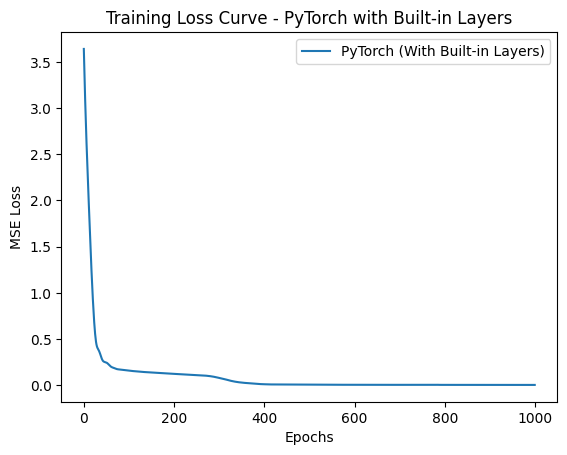

In [6]:
# Step 3: Implementing a 3-Layer Neural Network Using PyTorch's Built-in Layers

import torch
import torch.nn as nn
import torch.optim as optim

# Define the PyTorch Neural Network using nn.Module
class ThreeLayerNN_PyTorch_Module(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(ThreeLayerNN_PyTorch_Module, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)  # First hidden layer
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)  # Second hidden layer
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)  # Output layer

    def forward(self, x):
        """Forward pass"""
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)  # Linear activation for regression
        return x

# Convert dataset to PyTorch tensors
X_train_torch = torch.tensor(df[["x1", "x2", "x3"]].values, dtype=torch.float32)
y_train_torch = torch.tensor(df[["y"]].values, dtype=torch.float32)

# Initialize the PyTorch neural network using built-in layers
model = ThreeLayerNN_PyTorch_Module(input_size=3, hidden_size1=10, hidden_size2=5, output_size=1)

# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 1000
losses_module = []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_torch)
    loss = criterion(outputs, y_train_torch)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store loss for plotting
    losses_module.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

# Plot the loss curve
plt.plot(losses_module, label="PyTorch (With Built-in Layers)")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve - PyTorch with Built-in Layers")
plt.legend()
plt.show()


## Implementing a 3-Layer Neural Network Using PyTorch Lightning

Instead of writing manual training loops as in the previous PyTorch implementations, PyTorch Lightning simplifies training by handling:

✔ Model definition

✔ Loss calculation

✔ Optimization

✔ Training loop (batching, gradient updates)

PyTorch Lightning is a higher-level API for PyTorch, designed to make deep learning model training more structured, efficient, and scalable.

In [8]:
!pip install pytorch-lightning


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 41.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type    | Params | Mode 
----------------------------------------------
0 | fc1       | Linear  | 40     | train
1 | relu1     | ReLU    | 0      | train
2 | fc2       | Linear  | 55     | train
3 | relu2     | ReLU    | 0      | train
4 | fc3       | Linear  | 6      | train
5 | criterion | MSELoss | 0      | train
----------------------------------------------
101       Trainable params
0         Non-trainable params
101       Total params
0.000     Total estimated model params size (MB)
6         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


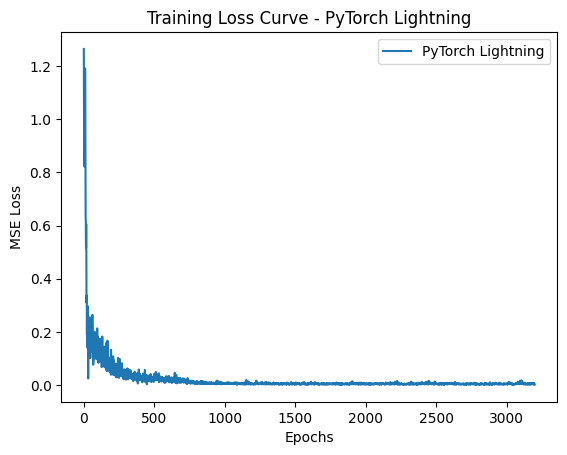

In [13]:
# Step 4: Implementing a 3-Layer Neural Network Using PyTorch Lightning with Loss Plotting

import pytorch_lightning as pl
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Define the PyTorch Lightning Model
class ThreeLayerNN_Lightning(pl.LightningModule):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, learning_rate=0.01):
        super(ThreeLayerNN_Lightning, self).__init__()
        self.learning_rate = learning_rate
        self.losses = []  # Store losses for visualization

        # Define layers using PyTorch built-in modules
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)

        # Define loss function
        self.criterion = nn.MSELoss()

    def forward(self, x):
        """Forward pass"""
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

    def training_step(self, batch, batch_idx):
        """Training step: Computes loss and logs it."""
        x, y = batch
        y_pred = self.forward(x)
        loss = self.criterion(y_pred, y)

        # Store loss for plotting
        self.losses.append(loss.item())

        return loss

    def configure_optimizers(self):
        """Define the optimizer."""
        return optim.Adam(self.parameters(), lr=self.learning_rate)

# Convert dataset to PyTorch tensors
X_train_torch = torch.tensor(df[["x1", "x2", "x3"]].values, dtype=torch.float32)
y_train_torch = torch.tensor(df[["y"]].values, dtype=torch.float32).view(-1, 1)  # Ensure y is shaped correctly

# Create DataLoader for batching
dataset = TensorDataset(X_train_torch, y_train_torch)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Initialize the PyTorch Lightning model
model_lightning = ThreeLayerNN_Lightning(input_size=3, hidden_size1=10, hidden_size2=5, output_size=1, learning_rate=0.01)

# Train the model using PyTorch Lightning Trainer
trainer = pl.Trainer(max_epochs=100, enable_checkpointing=False, logger=False)
trainer.fit(model_lightning, train_loader)

# Plot the loss curve
plt.plot(model_lightning.losses, label="PyTorch Lightning")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve - PyTorch Lightning")
plt.legend()
plt.show()


## Implementing a 3-Layer Neural Network Using TensorFlow (Keras API)

In this step, we implement the same 3-layer deep neural network but using TensorFlow and Keras API instead of PyTorch. TensorFlow provides high-level APIs for defining, training, and optimizing deep learning models.

Why Use TensorFlow?

✔ TensorFlow's Keras API simplifies model building.

✔ Automatic differentiation makes backpropagation easier.

✔ Efficient GPU acceleration for fast training.

✔ Flexible deployment (works on cloud, mobile, and edge devices).

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.8015
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2450
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1344
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0962
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0764
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0641
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0529
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0395
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0333
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0249
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0217
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0212
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0169
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0156
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0157
Epoc

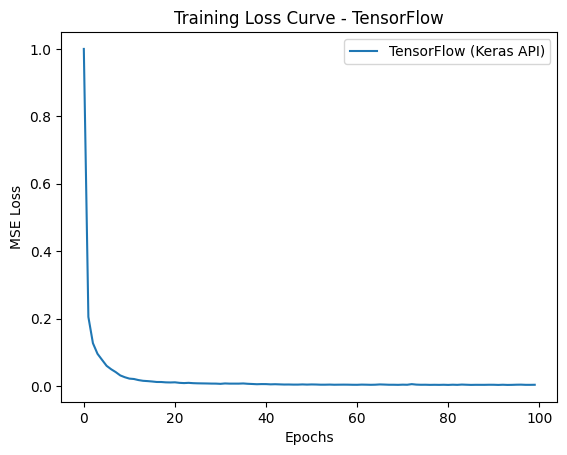

In [15]:
# Step 5: Implementing a 3-Layer Neural Network in TensorFlow

import tensorflow as tf

# Define the TensorFlow model using the Keras Sequential API
class ThreeLayerNN_TensorFlow(tf.keras.Model):
    def __init__(self, hidden_size1, hidden_size2, output_size):
        super(ThreeLayerNN_TensorFlow, self).__init__()
        self.fc1 = tf.keras.layers.Dense(hidden_size1, activation='relu')  # First hidden layer
        self.fc2 = tf.keras.layers.Dense(hidden_size2, activation='relu')  # Second hidden layer
        self.fc3 = tf.keras.layers.Dense(output_size)  # Output layer (linear activation)

    def call(self, inputs):
        """Forward pass"""
        x = self.fc1(inputs)
        x = self.fc2(x)
        x = self.fc3(x)  # No activation for regression output
        return x

# Convert dataset to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(df[["x1", "x2", "x3"]].values, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(df[["y"]].values, dtype=tf.float32)

# Create a TensorFlow dataset for batching
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tf, y_train_tf)).batch(32).shuffle(buffer_size=1000)

# Initialize the TensorFlow model
model_tf = ThreeLayerNN_TensorFlow(hidden_size1=10, hidden_size2=5, output_size=1)

# Define loss function and optimizer
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compile the model
model_tf.compile(optimizer=optimizer, loss=loss_fn)

# Train the model
history = model_tf.fit(train_dataset, epochs=100, verbose=1)

# Plot the loss curve
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label="TensorFlow (Keras API)")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve - TensorFlow")
plt.legend()
plt.show()


## Implementing a 3-Layer Neural Network in TensorFlow Without High-Level APIs (Manual Training Loop)
What Are We Doing in This Step?
Unlike Step 5 (where we used Keras high-level APIs), in this step, we:

✔ Manually implement forward and backward passes using low-level TensorFlow operations.

✔ Manually update weights using tf.GradientTape() instead of model.fit().

✔ Define and apply activation functions explicitly instead of using tf.keras.layers.Dense.

Epoch 0: Loss = 2.060374
Epoch 100: Loss = 0.167185
Epoch 200: Loss = 0.146867
Epoch 300: Loss = 0.139779
Epoch 400: Loss = 0.134874


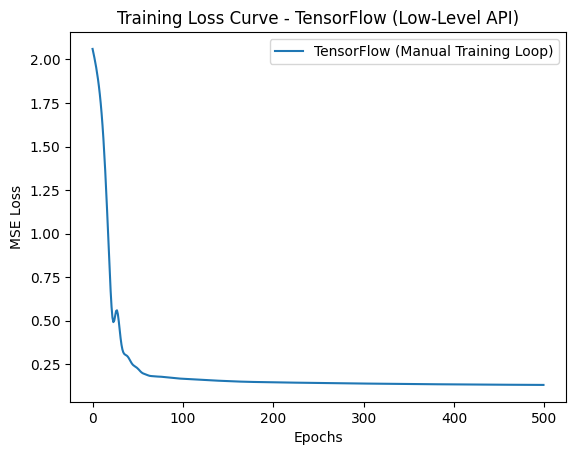

In [20]:
# Step 6: Implementing a 3-Layer Neural Network in TensorFlow Without High-Level APIs (Manual Training Loop)

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def relu(x):
    return tf.maximum(0.0, x)

# Define model parameters
input_size = 3
hidden_size1 = 10
hidden_size2 = 5
output_size = 1
learning_rate = 0.01
epochs = 500

# Initialize weights and biases manually
W1 = tf.Variable(tf.random.normal([input_size, hidden_size1], stddev=0.01))
b1 = tf.Variable(tf.zeros([hidden_size1]))
W2 = tf.Variable(tf.random.normal([hidden_size1, hidden_size2], stddev=0.01))
b2 = tf.Variable(tf.zeros([hidden_size2]))
W3 = tf.Variable(tf.random.normal([hidden_size2, output_size], stddev=0.01))
b3 = tf.Variable(tf.zeros([output_size]))

# Convert dataset to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(df[["x1", "x2", "x3"]].values, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(df[["y"]].values, dtype=tf.float32)

# Define forward pass
def forward(X):
    Z1 = tf.matmul(X, W1) + b1
    A1 = relu(Z1)
    Z2 = tf.matmul(A1, W2) + b2
    A2 = relu(Z2)
    Z3 = tf.matmul(A2, W3) + b3  # Linear activation for regression output
    return Z3

# Define Mean Squared Error Loss
def mse_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Training Loop
losses_manual = []
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = forward(X_train_tf)  # Forward pass
        loss = mse_loss(y_train_tf, y_pred)  # Compute loss

    # Compute gradients
    gradients = tape.gradient(loss, [W1, b1, W2, b2, W3, b3])

    # Update parameters manually
    optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2, W3, b3]))

    # Store loss for plotting
    losses_manual.append(loss.numpy())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.numpy():.6f}")

# Plot the loss curve
plt.plot(losses_manual, label="TensorFlow (Manual Training Loop)")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve - TensorFlow (Low-Level API)")
plt.legend()
plt.show()


## Implementing a 3-Layer Neural Network in TensorFlow Using tf.einsum() Instead of tf.matmul()

What Are We Doing in This Step? In this step, we improve the TensorFlow low-level implementation by:

✔ Replacing tf.matmul() with tf.einsum() for matrix operations.

✔ Implementing forward and backward passes manually like in Step 6.

✔ Using tf.GradientTape() for backpropagation to update weights.

✔ Training the model with Adam optimizer and visualizing the loss curve.

🔹 Why Use tf.einsum() Instead of tf.matmul()?

✔ More flexible than tf.matmul() for complex tensor operations.

✔ More optimized in certain cases, especially for large models.

✔ Allows explicit control over index notation, making operations more intuitive.

Epoch 0: Loss = 2.060367
Epoch 100: Loss = 0.191371
Epoch 200: Loss = 0.155883
Epoch 300: Loss = 0.141867
Epoch 400: Loss = 0.134982


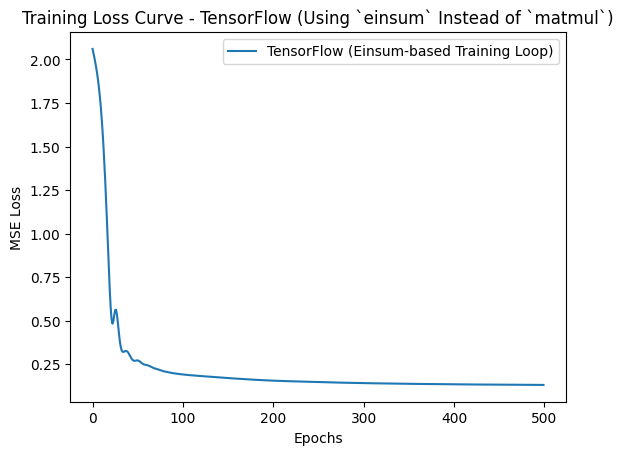

In [22]:
# Step 7: Implementing a 3-Layer Neural Network in TensorFlow Using `tf.einsum()` Instead of `tf.matmul()`

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def relu(x):
    return tf.maximum(0.0, x)  # ReLU activation

# Initialize model parameters
input_size = 3
hidden_size1 = 10
hidden_size2 = 5
output_size = 1
learning_rate = 0.01
epochs = 500

# Initialize weights and biases manually
W1 = tf.Variable(tf.random.normal([input_size, hidden_size1], stddev=0.01))
b1 = tf.Variable(tf.zeros([hidden_size1]))
W2 = tf.Variable(tf.random.normal([hidden_size1, hidden_size2], stddev=0.01))
b2 = tf.Variable(tf.zeros([hidden_size2]))
W3 = tf.Variable(tf.random.normal([hidden_size2, output_size], stddev=0.01))
b3 = tf.Variable(tf.zeros([output_size]))

# Convert dataset to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(df[["x1", "x2", "x3"]].values, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(df[["y"]].values, dtype=tf.float32)

# Define forward pass using `tf.einsum()`
def forward(X):
    Z1 = tf.einsum("ij,jk->ik", X, W1) + b1
    A1 = relu(Z1)
    Z2 = tf.einsum("ij,jk->ik", A1, W2) + b2
    A2 = relu(Z2)
    Z3 = tf.einsum("ij,jk->ik", A2, W3) + b3  # Linear activation for regression output
    return Z3

# Define Mean Squared Error (MSE) Loss
def mse_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Training Loop
losses_einsum = []
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = forward(X_train_tf)  # Forward pass
        loss = mse_loss(y_train_tf, y_pred)  # Compute loss

    # Compute gradients
    gradients = tape.gradient(loss, [W1, b1, W2, b2, W3, b3])

    # Update parameters manually
    optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2, W3, b3]))

    # Store loss for plotting
    losses_einsum.append(loss.numpy())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.numpy():.6f}")

# Plot the loss curve
plt.plot(losses_einsum, label="TensorFlow (Einsum-based Training Loop)")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve - TensorFlow (Using `einsum` Instead of `matmul`)")
plt.legend()
plt.show()


### First Hidden Layer: Compute Z1 = X @ W1 + b1, then apply ReLU activation
Z1 = tf.einsum("ij,jk->ik", X, W1) + b1  # Matrix multiplication between input (X) and first layer weights (W1)
A1 = relu(Z1)  # Apply ReLU activation function

### Second Hidden Layer: Compute Z2 = A1 @ W2 + b2, then apply ReLU activation
Z2 = tf.einsum("ij,jk->ik", A1, W2) + b2  # Matrix multiplication between first hidden layer output (A1) and second layer weights (W2)
A2 = relu(Z2)  # Apply ReLU activation function

### Output Layer: Compute final output Z3 = A2 @ W3 + b3 (No activation for regression)
Z3 = tf.einsum("ij,jk->ik", A2, W3) + b3  # Matrix multiplication between second hidden layer output (A2) and final layer weights (W3)

### Z3 is the final output of the network, and since it's a regression model, we do not apply an activation function


## Implementing a 3-Layer Neural Network Using TensorFlow Functional API
📌 What Are We Doing in This Step?
In this step, we implement the same 3-layer deep neural network but using the TensorFlow Functional API, which provides:
✔ More flexibility than Sequential API, allowing complex architectures.

✔ Easier debugging than subclassing (tf.keras.Model), with explicit layer connections.

✔ Automatic graph construction and optimization by TensorFlow.

Unlike previous steps, where we manually handled weights and forward passes, the Functional API automatically manages:

- Layer connections
- Backpropagation
- Gradient updates

Epoch 1/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.2421
Epoch 2/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1944
Epoch 3/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1743
Epoch 4/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1676
Epoch 5/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1542
Epoch 6/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1238
Epoch 7/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0941
Epoch 8/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0621
Epoch 9/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0390
Epoch 10/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0268
Epoch 11/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0160
Epoch 12/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0137
Epoch 13/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0090
Epoch 14/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0073
Epoch 15/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0065
Epo

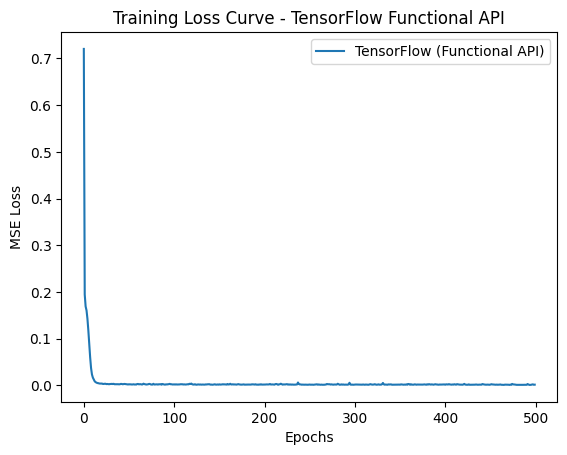

In [23]:
# Step 8: Implementing a 3-Layer Neural Network Using TensorFlow Functional API

import tensorflow as tf
import matplotlib.pyplot as plt

# Convert dataset to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(df[["x1", "x2", "x3"]].values, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(df[["y"]].values, dtype=tf.float32)

# Define input layer
inputs = tf.keras.Input(shape=(3,))

# First hidden layer
x = tf.keras.layers.Dense(10, activation="relu")(inputs)

# Second hidden layer
x = tf.keras.layers.Dense(5, activation="relu")(x)

# Output layer (no activation since it's regression)
outputs = tf.keras.layers.Dense(1)(x)

# Define the model
model_func = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile model
model_func.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="mse")

# Train the model
history = model_func.fit(X_train_tf, y_train_tf, epochs=500, verbose=1)

# Plot the loss curve
plt.plot(history.history["loss"], label="TensorFlow (Functional API)")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve - TensorFlow Functional API")
plt.legend()
plt.show()


## Implementing a 3-Layer Neural Network Using TensorFlow Model API (Subclassing tf.keras.Model)
📌 What Are We Doing in This Step?
In this step, we implement the same 3-layer neural network but using TensorFlow's tf.keras.Model subclassing API.

Unlike the Functional API (Step 8), where we define the model using tf.keras.Model(inputs, outputs), here we: ✔ Create a custom model class by subclassing tf.keras.Model.

✔ Explicitly define layers inside the class constructor (__init__).

✔ Use the call() method to define the forward pass.

✔ Train the model using model.fit(), just like before.

🔹 Why Use the Model API?

✔ More flexible than both Sequential and Functional APIs.

✔ Allows defining complex architectures with custom layers.

✔ Better for research and experimentation (e.g., custom activation functions, loss functions, etc.).

✔ Easier to debug and extend.



Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0707
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2153
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1514
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1350
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0969
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0665
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0460
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0343
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0297
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0245
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0208
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0171
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0168
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0149
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0126
Epoc

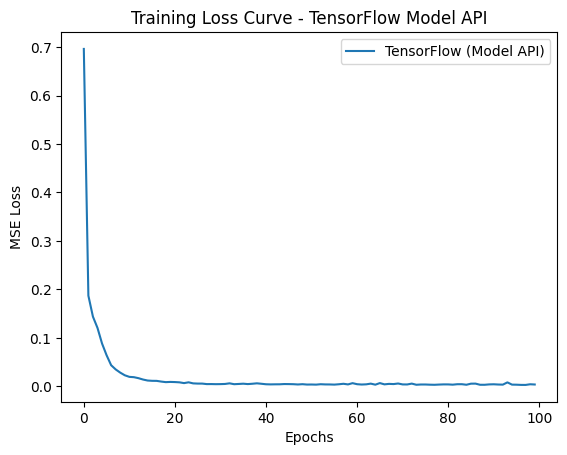

In [25]:
# Step 9: Implementing a 3-Layer Neural Network Using TensorFlow Model API (Subclassing `tf.keras.Model`)

import tensorflow as tf
import matplotlib.pyplot as plt

# Convert dataset to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(df[["x1", "x2", "x3"]].values, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(df[["y"]].values, dtype=tf.float32)

# Define a custom neural network using TensorFlow Model API (Subclassing `tf.keras.Model`)
class ThreeLayerNN_TFModel(tf.keras.Model):
    def __init__(self, hidden_size1, hidden_size2, output_size):
        super(ThreeLayerNN_TFModel, self).__init__()
        self.fc1 = tf.keras.layers.Dense(hidden_size1, activation="relu")  # First hidden layer
        self.fc2 = tf.keras.layers.Dense(hidden_size2, activation="relu")  # Second hidden layer
        self.fc3 = tf.keras.layers.Dense(output_size)  # Output layer (no activation)

    def call(self, inputs):
        """Defines the forward pass of the model"""
        x = self.fc1(inputs)
        x = self.fc2(x)
        x = self.fc3(x)  # No activation in output (regression)
        return x

# Initialize the custom model
model_subclass = ThreeLayerNN_TFModel(hidden_size1=10, hidden_size2=5, output_size=1)

# Compile the model with Mean Squared Error (MSE) loss and Adam optimizer
model_subclass.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="mse")

# Train the model using `model.fit()`
history = model_subclass.fit(X_train_tf, y_train_tf, epochs=100, verbose=1)

# Plot the loss curve
plt.plot(history.history["loss"], label="TensorFlow (Model API)")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve - TensorFlow Model API")
plt.legend()
plt.show()


## Implementing a 3-Layer Neural Network Using TensorFlow Built-in Layers (Sequential API)
📌 What Are We Doing in This Step?
In this step, we simplify our 3-layer neural network using TensorFlow’s Sequential API.
Instead of manually subclassing tf.keras.Model (Step 9), we:
✔ Use tf.keras.Sequential() to define the model in a linear stack of layers.

✔ Eliminate the need to define a call() method for forward propagation.

✔ Train the model using model.fit() like in previous steps.

This is the simplest and most concise way to define a deep neural network in TensorFlow.

🔹 Why Use the Sequential API?

✔ Easiest way to define a neural network (perfect for simple models).

✔ Less boilerplate code compared to Functional and Model APIs.

✔ Automatic handling of weight initialization and connections.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1762
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1624
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1298
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0961
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0883
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0719
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0491
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0364
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0235
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0189
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0122
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0099
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0088
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0091
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0065
Epoc

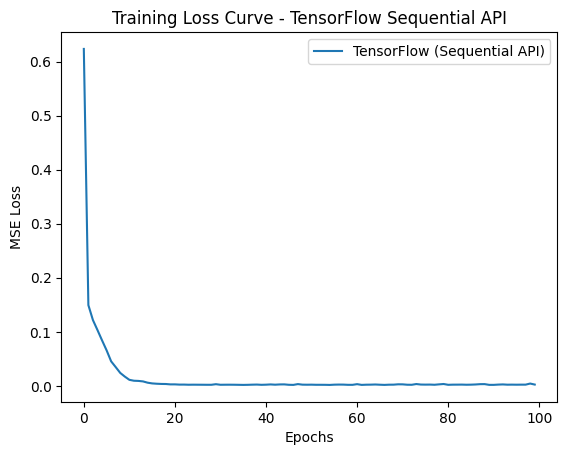

In [27]:
# Step 10: Implementing a 3-Layer Neural Network Using TensorFlow Built-in Layers (Sequential API)

import tensorflow as tf
import matplotlib.pyplot as plt

# Convert dataset to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(df[["x1", "x2", "x3"]].values, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(df[["y"]].values, dtype=tf.float32)

# Define the model using Sequential API
model_seq = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu", input_shape=(3,)),  # First hidden layer
    tf.keras.layers.Dense(5, activation="relu"),  # Second hidden layer
    tf.keras.layers.Dense(1)  # Output layer (no activation for regression)
])

# Compile the model
model_seq.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="mse")

# Train the model
history = model_seq.fit(X_train_tf, y_train_tf, epochs=100, verbose=1)

# Plot the loss curve
plt.plot(history.history["loss"], label="TensorFlow (Sequential API)")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve - TensorFlow Sequential API")
plt.legend()
plt.show()
